In [74]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.decomposition import TruncatedSVD

In [75]:
data = load_breast_cancer()
X = data["data"]
Y = data["target"]
weights = np.zeros(X.shape[1] + 1)

In [81]:
def train_loop(X, Y, num_epoch=100, use_bias=True):
    if use_bias:
        weights = np.zeros(X.shape[1] + 1)
    else:
        weights = np.zeros(X.shape[1])
    for epoch in range(num_epoch):
        # if epoch % 50 == 0:
        #     np.random.shuffle(X)
        correct = 0
        for x, y in zip(X, Y):
            if use_bias:
                x = np.append(x, np.ones(1, dtype=np.float32))
            # 1 = positive, 0 = negative
            pred = int(x.dot(weights) >= 0.0)
            if pred != y:
                # Mistake
                if y == 1:
                    weights += x 
                else:
                    weights -= x
            else:
                correct += 1
            # print(weights)
        if epoch % 10 == 0:
            print(f"Train Accuracy: {100 * correct / len(X):.1f}%")
    return weights

In [88]:
weights = train_loop(data["data"], data["target"])
weights

Train Accuracy: 70.5%
Train Accuracy: 85.6%
Train Accuracy: 88.6%
Train Accuracy: 87.9%
Train Accuracy: 88.4%
Train Accuracy: 89.1%
Train Accuracy: 89.3%
Train Accuracy: 89.5%
Train Accuracy: 91.4%
Train Accuracy: 90.0%


array([ 4.87601200e+03, -1.85643000e+03,  2.40514900e+04,  3.59900000e+03,
        1.86168400e+01, -1.42313410e+02, -2.66954281e+02, -9.74190140e+01,
        3.45498000e+01,  2.18108200e+01,  3.37082000e+01, -3.12494000e+02,
       -5.14361600e+02, -1.01031000e+04, -2.70530700e+00, -4.10973890e+01,
       -6.38804466e+01, -1.22294320e+01, -7.25501700e+00, -2.21569420e+00,
        5.30702600e+03, -4.38641000e+03,  2.05585100e+04, -9.47200000e+03,
        9.64045000e+00, -4.86735010e+02, -7.12332076e+02, -1.66050518e+02,
       -2.18852000e+01, -5.42300000e+00,  6.47000000e+02])

In [82]:
svd = TruncatedSVD()
small = svd.fit_transform(X)

In [85]:
small_weights = train_loop(small, Y, use_bias=False)

Train Accuracy: 68.7%
Train Accuracy: 79.4%
Train Accuracy: 79.6%
Train Accuracy: 78.0%
Train Accuracy: 79.6%
Train Accuracy: 80.0%
Train Accuracy: 79.4%
Train Accuracy: 79.6%
Train Accuracy: 79.8%
Train Accuracy: 79.6%


In [86]:
small_weights

array([  -878.71376085, -13645.83604225])

In [97]:
rotated = np.zeros_like(small_weights) 
rotated[0] = small_weights[1]
rotated[1] = -1.0 * small_weights[0]

In [98]:
rotated

array([-13645.83604225,    878.71376085])

In [99]:
rotated[1] / rotated[0]

-0.06439427808798381

In [90]:
import matplotlib.pyplot as plt

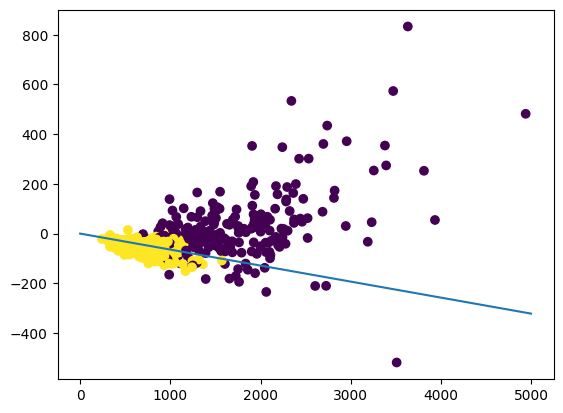

In [101]:
f, ax = plt.subplots()
ax.scatter(small[:, 0], small[:, 1], c=Y)
line_x = np.linspace(0, 5000, 5)
line_y = line_x * (rotated[1] / rotated[0])
ax.plot(line_x, line_y)